<a href="https://colab.research.google.com/github/nicolenair/fine-tune-MaskRcnn/blob/master/data_preprocess_from_masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
import json
os.chdir('/content/gdrive/My Drive')
#https://haochen23.github.io/2020/06/fine-tune-mask-rcnn.html#.Xvj9Bmozau4

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
os.chdir("PartFace")

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
mask1 = cv2.imread("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images/Bob_Krueger_0001.ppm")
cv2.imwrite("bk.png", mask1)

True

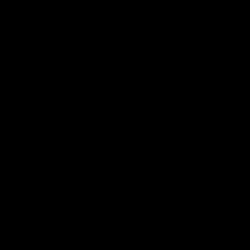

In [36]:
cv2_imshow(np.zeros((250, 250)))

In [42]:
import re
mask2  = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
for i in range(len(mask2)):
  for e in range(len(mask2[i])):
    if mask2[i][e]==29:
      mask2[i][e]=0
    else:
      mask2[i][e]=255

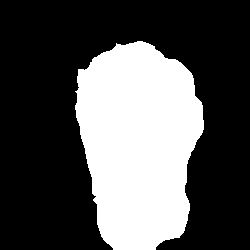

In [43]:
cv2_imshow(mask2)

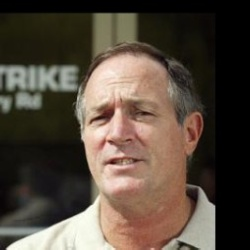

In [ ]:
image = cv2.imread("lfw_funneled/Bob_Krueger/Bob_Krueger_0001.jpg")
cv2_imshow(image)

11


In [ ]:
"""
"00000000.jpg8183":
{"filename":"00000000.jpg",
"size":8183,
"regions":
  [{"shape_attributes":
    {"name":"polygon",
    "all_points_x":[99,111,124,129,134,132,144,155,146,149,166,171,168,185,190,190,178,179,198,201,204,210,213,255,271,283,287,277,279,293,298,298,285,285,293,313,325,322,339,341,336,322,320,313,300,321,325,325,323,316,311,303,283,212,195,167,134,113],
    "all_points_y":[72,106,111,108,121,158,177,241,252,265,265,253,187,193,193,244,267,276,271,267,251,228,179,159,183,191,212,220,225,226,219,180,168,161,167,195,218,240,240,231,205,161,151,118,100,70,57,21,11,8,12,59,83,89,58,41,41,54]},
    "region_attributes":{"name":"beagle"}}],
    "file_attributes":{}}"""



'\n"00000000.jpg8183":\n{"filename":"00000000.jpg",\n"size":8183,\n"regions":\n  [{"shape_attributes":\n    {"name":"polygon",\n    "all_points_x":[99,111,124,129,134,132,144,155,146,149,166,171,168,185,190,190,178,179,198,201,204,210,213,255,271,283,287,277,279,293,298,298,285,285,293,313,325,322,339,341,336,322,320,313,300,321,325,325,323,316,311,303,283,212,195,167,134,113],\n    "all_points_y":[72,106,111,108,121,158,177,241,252,265,265,253,187,193,193,244,267,276,271,267,251,228,179,159,183,191,212,220,225,226,219,180,168,161,167,195,218,240,240,231,205,161,151,118,100,70,57,21,11,8,12,59,83,89,58,41,41,54]},\n    "region_attributes":{"name":"beagle"}}],\n    "file_attributes":{}}'

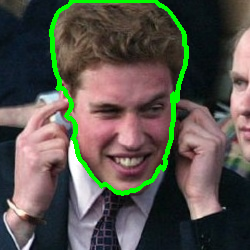

In [48]:
# # list(contours[0][:,0][:,0])
# print(len(os.listdir("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images")))
cv2_imshow(cv2.drawContours(cv2.imread("lfw_funneled/Prince_William/Prince_William_0001.jpg"), contours, -1, (0,255,0), 3))



In [49]:
im_list = os.listdir("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images")[:1927]
diction_train = {}
for i in im_list:
  print(i)
  i2 = "parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images/" + i
  ppm = cv2.imread(i2)
  cv2.imwrite(i2[:-3]+"png", ppm)
  im = cv2.imread(i2[:-3]+"png")
  id = i[:-3]+"png" + str(im.shape[0]*im.shape[1])
  filename = i[:-3]+"png"
  size = im.shape[0]*im.shape[1]
  file_attributes = {}
  name = "polygon"
  mask2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  for h in range(len(mask2)):
    for k in range(len(mask2[h])):
      if mask2[h][k]==29:
        mask2[h][k]=0
      else:
        mask2[h][k]=255
  ret, thresh = cv2.threshold(mask2, 127, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  all_points_x = contours[0][:,0][:,0]
  all_points_y = contours[0][:,0][:,1]
  region_attributes = {"name":"beagle"}
  diction_train[id] = {"filename":filename, "size":size, "regions":\
                   [{"shape_attributes":\
                     {"name":name,\
                      "all_points_x": [int(e) for e in all_points_x],\
                      "all_points_y": [int(e) for e in all_points_y]},\
                     "region_attributes":region_attributes}],\
                   "file_attributes":{}}
  # print(i)
  # print("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg")
  cv2.imwrite('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/train/' +  i[:-3]+"png", cv2.imread("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg"))  #"Bob_Krueger/Bob_Krueger_0001.jpg"))
with open('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/train/via_region_data.json', 'w') as fp:
    json.dump(diction_train, fp)

Prince_William_0001.png
Maurice_Strong_0001.png
Ray_Morrough_0001.png
Igor_Ivanov_0016.png
Ronald_Perelman_0001.png
Bob_Curtis_0001.png
Ben_Howland_0002.png
Heather_Locklear_0001.png
Pete_Beaudrault_0001.png
Vladimir_Voltchkov_0002.png
John_Henry_0001.png
Sheila_Fraser_0001.png
Monique_Garbrecht-Enfeldt_0002.png
Jennifer_Garner_0001.png
Conan_OBrien_0002.png
Platon_Lebedev_0001.png
Adam_Sandler_0001.png
Keanu_Reeves_0002.png
Tim_Henman_0015.png
Mickey_Sherman_0001.png
Fred_Thompson_0002.png
Daryl_Hannah_0002.png
Elodie_Bouchez_0001.png
Francis_Ford_Coppola_0002.png
Edgar_Savisaar_0001.png
Jia_Qinglin_0002.png
Jim_Tressel_0001.png
Mario_Vasquez_Rana_0001.png
Guillermo_Coria_0027.png
Helen_Alvare_0001.png
Carlos_Vives_0001.png
Chen_Liang_Yu_0002.png
Keira_Knightley_0002.png
Sarah_Hughes_0001.png
Ricky_Martin_0001.png
Suzie_McConnell_Serio_0001.png
William_Hochul_0002.png
Bob_Huggins_0002.png
Dimitar_Berbatov_0001.png
Tiger_Woods_0001.png
Jennifer_Lopez_0010.png
Inocencio_Arias_0002.png
J

In [50]:
im_list = os.listdir("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images")[1927:]
diction_train = {}
for o, i in enumerate(im_list):
  print(o)
  i2 = "parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images/" + i
  ppm = cv2.imread(i2)
  cv2.imwrite(i2[:-3]+"png", ppm)
  im = cv2.imread(i2[:-3]+"png")
  id = i[:-3]+"png" + str(im.shape[0]*im.shape[1])
  filename = i[:-3]+"png"
  size = im.shape[0]*im.shape[1]
  file_attributes = {}
  name = "polygon"
  mask2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  for h in range(len(mask2)):
    for k in range(len(mask2[h])):
      if mask2[h][k]==29:
        mask2[h][k]=0
      else:
        mask2[h][k]=255
  ret, thresh = cv2.threshold(mask2, 127, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  all_points_x = contours[0][:,0][:,0]
  all_points_y = contours[0][:,0][:,1]
  region_attributes = {"name":"beagle"}
  diction_train[id] = {"filename":filename, "size":size, "regions":\
                   [{"shape_attributes":\
                     {"name":name,\
                      "all_points_x": [int(e) for e in all_points_x],\
                      "all_points_y": [int(e) for e in all_points_y]},\
                     "region_attributes":region_attributes}],\
                   "file_attributes":{}}
  # print(i)
  # print("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg")
  cv2.imwrite('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/val/' +  i[:-3]+"png", cv2.imread("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg"))  #"Bob_Krueger/Bob_Krueger_0001.jpg"))
with open('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/val/via_region_data.json', 'w') as fp:
    json.dump(diction_train, fp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow

In [ ]:
# os.listdir('/content/gdrive/My Drive/fine-tune-MaskRcnn')

['.git',
 'LICENSE',
 'README.md',
 'beagle.py',
 'mask_rcnn_coco.h5',
 'Mask_RCNN',
 '__pycache__',
 'beagle2',
 'beagle']

In [ ]:
# %%shell
# pip install -U scikit-image
# pip install -U cython
# pip3 install git+https://github.com/waleedka/coco.git#egg=pycocotools&subdirectory=PythonAPI

In [ ]:
# !wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
# !tar -xvzf "lfw-funneled.tgz" 